# Spam Classifier and TF-IDF scores
* By Wai Ping Jerry KWOK
* Created on 2023-11-07

### Objective:
The goal of the project is two fold: successfully implement a spam classifier to the YouTube comments from 5 different YouTube videos; and create code to calculate TF-IDF scores for a list of sentences.

### Instructions:
1. From the UCI ML Repository, you will need the following files: https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection
2. Alternatively, and easier, the same files are in the LEARN shell.

## Task 1: Data Exploration

### 1.1 The Data

In [35]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import math

In [2]:
# import sklearn libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

**Read in just the Psy file to your Jupyter Notebook.** (1 point)

In [3]:
# read in the psy data
inp_psy = pd.read_csv('Youtube01-Psy.csv')

**Display the head and tail of the file.** (1 point)

In [4]:
# display the first 5 rows of the data
inp_psy.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [5]:
# display the last 5 rows of the data
inp_psy.tail()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1
349,z13vhvu54u3ewpp5h04ccb4zuoardrmjlyk0k,Ray Benich,2015-06-05T18:05:16,The first billion viewed this because they tho...,0


**Give the number of rows in the file.** (1 point)

In [6]:
# print the number of rows
print('Number of rows = ', inp_psy.shape[0])

Number of rows =  350


**Display the number of spam and ham comments for the file.** (2 points)

In [7]:
# print the number of spam messages according to the 'CLASS' column with 0 = ham, 1 = spam
print('Number of spam messages = ', inp_psy[inp_psy['CLASS'] == 1].shape[0])

# print the number of ham messages according to the 'CLASS' column with 0 = ham, 1 = spam
print('Number of ham messages = ', inp_psy[inp_psy['CLASS'] == 0].shape[0])


Number of spam messages =  175
Number of ham messages =  175


**Discuss the balance of the dataset and the balance of the classes spam/ham. Based on this, what sort of classifiers are appropriate for the task?** (3 marks)

**Discussion**
1. We have exactly equal number of spam and ham comments in the psy file. Therefore, the dataset is perfectly balanced.
2. Since the dataset is perfectly balanced, we do not have limitations in choosing the classifiers. We may consider simple classifiers such as Decision Tress or Random Forest for this problem and see if we are satisfied with the testing accuracy.
3. We also do not have limitations on sampling for our train/test split because the probability of the split being concentrated in one class is low.

### 1.2 Data Transformation

**Create a bag-of-words for the Psy file. The fit and transform should be done on the ‘CONTENT’ of your data.** (2 points)

In [8]:
# create an object of CountVectorizer() class
count_vectorizer = CountVectorizer()

# fit the vectorizer on inp_psy['CONTENT']
psy_X = count_vectorizer.fit_transform(inp_psy['CONTENT'])

**Display the matrix information.** (2 points)

In [9]:
# display the matrix information 
psy_X

<350x1418 sparse matrix of type '<class 'numpy.int64'>'
	with 4354 stored elements in Compressed Sparse Row format>

**How many different words are in your bag of words?** (1 point)

In [10]:
# print the number of different words in the matrix
print('Number of words = ', psy_X.shape[1])

Number of words =  1418


**Discussion**
1. There are 1418 different words in the bag of words of the psy file.

**Display the 349th comment in the Psy file.** (2 points)

**Discussion**
1. Since the 1st item is item[0], the 349th item is item[348]

In [11]:
# display the 349th row of 'CONTENT' column of inp_psy dataframe
inp_psy['CONTENT'][348]

'hi guys please my android photo editor download. thanks https://play.google.com/store/apps/details?id=com.butalabs.photo.editor\ufeff'

**Using 'analyze' ,or something similar, give the breakdown of the 349th comment.** (2 points)

In [12]:
# build an analyzer to get the tokens
analyze = count_vectorizer.build_analyzer()

# give the breakdown of the 349th row of 'CONTENT' column
analyze(inp_psy['CONTENT'][348])

['hi',
 'guys',
 'please',
 'my',
 'android',
 'photo',
 'editor',
 'download',
 'thanks',
 'https',
 'play',
 'google',
 'com',
 'store',
 'apps',
 'details',
 'id',
 'com',
 'butalabs',
 'photo',
 'editor']

## Task 2: Training and Testing Sets

**Shuffle your dataset(frac=1).** (1 point)

In [13]:
# shuffle the inp_psy dataframe
inp_psy_shu = inp_psy.sample(frac=1, random_state=80)

**Create your training and testing splits by using the first 300 entries for training and the remaining for testing. Name them appropriately.** (3 points)

In [14]:
# split the psy dataset into training and testing sets
train_psy, test_psy = train_test_split(inp_psy_shu, train_size=300, random_state=80)

**Create your training and testing attributes BOW. Name them appropriately.** (2 points)

In [15]:
# create the training BOW
d_train_att = count_vectorizer.transform(train_psy['CONTENT'])

In [16]:
# create the testing BOW
d_test_att = count_vectorizer.transform(test_psy['CONTENT'])

**Create your training and testing labels. Name them appropriately.** (2 points)

In [17]:
# create a separate df to store the training labels
d_train_label = train_psy['CLASS']

In [18]:
# create a separate df to store the testing labels
d_test_label = test_psy['CLASS']

**Output the matrix information of *d_train_att* and *d_test_att*. What are the dimensions of the matrices?** (3 points)

In [19]:
# output the matrix information of the training BOW
d_train_att

<300x1418 sparse matrix of type '<class 'numpy.int64'>'
	with 3796 stored elements in Compressed Sparse Row format>

In [20]:
# dimension of the training BOW
d_train_att.shape

(300, 1418)

In [21]:
# output the matrix information of the testing BOW
d_test_att

<50x1418 sparse matrix of type '<class 'numpy.int64'>'
	with 558 stored elements in Compressed Sparse Row format>

In [22]:
# dimension of the testing BOW
d_test_att.shape

(50, 1418)

## Task 3: Random Forest Classifier

**Implement a Random Forest classifier. With 50 trees, output.** (3 points)

In [23]:
# create a random forest classifier with 50 trees
rfc = RandomForestClassifier(n_estimators=50, random_state=80)

**Train the classifier on the training data and test its performance on the testing data.** (2 points)

In [24]:
# fit the model on training dataset
rfc.fit(d_train_att, d_train_label)

RandomForestClassifier(n_estimators=50, random_state=80)

In [25]:
# test the model on testing dataset
rfc.score(d_test_att, d_test_label)

0.96

**Print the training and testing accuracies.** (2 points)

In [26]:
# print the training accuracy
print('Training accuracy = ', rfc.score(d_train_att, d_train_label))

# print the testing accuracy
print('Testing accuracy = ', rfc.score(d_test_att, d_test_label))

Training accuracy =  1.0
Testing accuracy =  0.96


**Cross validate using 3 folds. Output the accuracies of the folds.** (3 points)

In [58]:
# perform 3-fold cross validation
scores = cross_val_score(rfc, d_train_att, d_train_label, cv=3)
print('Cross validation scores: ', scores)
print('Average Accuracy: ', round(scores.mean(), 4))
print('Standard deviation: ', round(scores.std(), 4))

Cross validation scores:  [0.95 0.93 0.99]
Average:  0.9567
Standard deviation:  0.0249


**Generate a confusion matrix for the Random Forest classifier's predictions on the test data.** (3 points)

In [28]:
# construct a confusion matrix
pred_labels = rfc.predict(d_test_att)
cm = confusion_matrix(d_test_label, pred_labels)
cm

array([[21,  0],
       [ 2, 27]], dtype=int64)

**Visualize this matrix (you may need to implement or use a utility function for visualization).** (3 points)

In [29]:
# setup the class names
class_names = ['ham', 'spam']

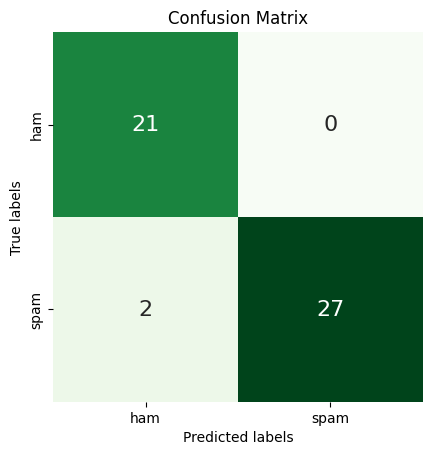

In [30]:
# visualize the confusion matrix
sns.heatmap(cm, cmap='Greens', cbar=False, square=True,
            annot=True, annot_kws={'size':16}, 
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## Task 4: Pipeline Data

**Recall that there are five comment files, we would like to compile all of them into a single file to use in the pipeline we create in what follows.**

**Concatenate your 5 files into one using .concat.** (3 points)

In [31]:
# read in the data
inp_kat = pd.read_csv('Youtube02-KatyPerry.csv')
inp_lmf = pd.read_csv('Youtube03-LMFAO.csv')
inp_emi = pd.read_csv('Youtube04-Eminem.csv')
inp_sha = pd.read_csv('Youtube05-Shakira.csv')

In [32]:
# concatenate all the dataframes
inp_all = pd.concat([inp_psy, inp_kat, inp_lmf, inp_emi, inp_sha])

**Provided you have concatenated the files correctly the length of your new file should be close to 2000. Output the length.** (1 point)

In [33]:
# print the number of rows
print('Number of rows = ', inp_all.shape[0])

Number of rows =  1956


**Check the spam-to-ham ratio in the new file; they should be balanced- about 1000 each. Output the number of spams and the number of hams.** (2 points)

In [34]:
# print the number of spam messages according to the 'CLASS' column with 0 = ham, 1 = spam
print('Number of spam messages = ', inp_all[inp_all['CLASS'] == 1].shape[0])

# print the number of ham messages according to the 'CLASS' column with 0 = ham, 1 = spam
print('Number of ham messages = ', inp_all[inp_all['CLASS'] == 0].shape[0])

Number of spam messages =  1005
Number of ham messages =  951


In [35]:
# calculate the spam ratio
print('Spam ratio = ', round(inp_all[inp_all['CLASS'] == 1].shape[0]/inp_all.shape[0]*100, 2), '%')

Spam ratio =  51.38 %


**Shuffle the new data and create content and label sets, and name them appropriately.** (3 points)

**Discussion**
1. The train size is 1500 to align with later steps.

In [36]:
# shuffle the inp_all dataframe
inp_all_shu = inp_all.sample(frac=1, random_state=80)

# split the inp_all dataset into training and testing sets
train_all, test_all = train_test_split(inp_all_shu, train_size=1500, random_state=80)

# create a separate df to store the training content
d_train_all_cont = train_all['CONTENT']

# create a separate df to store the testing content
d_test_all_cont = test_all['CONTENT']

# create a separate df to store the training labels
d_train_all_label = train_all['CLASS']

# create a separate df to store the testing labels
d_test_all_label = test_all['CLASS']

## Task 5: Pipeline Creation

**Read the sci-kit learn documentation on Pipelines. Name 3 advantages to using a pipeline. You can use any reference you wish to answer this question, just be sure to include the reference in your response.** (5 points)

**Discussion**

*Pipeline* is the most common tool to build a composite estimator by combining transformers with classifiers, regressors or other estimators. It is useful when there is a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. The advantages of using Pipeline
1. **Convenience and encapsulation**: We only have to call fit and predict once on your data to fit a whole sequence of estimators.
2. **Joint parameter selection**: We can grid search over parameters of all estimators in the pipeline at once.
3. **Safety**: Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

**Reference**

https://scikit-learn.org/stable/modules/compose.html

**Create a two-step pipeline with a bag-of-words step and a random forest step.** (3 points)

In [37]:
# create a pipeline of vectorizer and random forest classifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=80))
])

**Output the pipeline to display its steps.** (1 point)

In [38]:
# display the pipeline steps
pipeline.steps

[('vectorizer', CountVectorizer()),
 ('classifier', RandomForestClassifier(n_estimators=50, random_state=80))]

**Fit your pipeline with the first 1500 entries of the content and labels. Output.** (3 points)

In [39]:
# fit the pipeline on the training data
pipeline.fit(d_train_all_cont, d_train_all_label)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier',
                 RandomForestClassifier(n_estimators=50, random_state=80))])

**Use .score to score your pipeline.** (2 points)

In [40]:
# print the training accuracy
print('Training accuracy = ', pipeline.score(d_train_all_cont, d_train_all_label))

# print the testing accuracy
print('Testing accuracy = ', pipeline.score(d_test_all_cont, d_test_all_label))

Training accuracy =  1.0
Testing accuracy =  0.9692982456140351


**Use your pipeline to predict whether the following two comments are spam or ham.** (5 points)
1. "what a neat video"
2. "plz subscribe to my channel"

In [41]:
# create the comment
comment_1 = ['what a neat video']

# predict the label of comment_1
com_1_pred = pipeline.predict(comment_1)
com_1_pred[0]

0

**Discussion**
1. The predicted label is 0; it is a ham. 

In [42]:
# create the comment
comment_2 = ['plz subscribe to my channel']

# predict the label of comment_2
com_2_pred = pipeline.predict(comment_2)
com_2_pred[0]

1

**Discussion**
1. The predicted label is 1; it is a spam. 

**Cross-validate using your pipeline. Use cv=3. Print out the accuracies.** (3 points)

In [59]:
# cross validation with 3 folds
pl1_scores = cross_val_score(pipeline, d_train_all_cont, d_train_all_label, cv=3)

# print the cross validation scores, average and standard deviation
print('Cross validation scores: ', pl1_scores)
print('Average Accuracy: ', round(pl1_scores.mean(), 4))
print('Standard deviation: ', round(pl1_scores.std(), 4))

Cross validation scores:  [0.948 0.952 0.936]
Average Accuracy:  0.9453
Standard deviation:  0.0068


## Task 6: Pipeline 2 Creation

**Create a second pipeline named *pipeline2* which includes a TfidfTransformer step.** (3 points)

In [44]:
# create a pipeline of vectorizer, tfidf transformer and random forest classifier
pipeline2 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(random_state=80))
])

# display the pipeline steps
pipeline2.steps

[('vectorizer', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('classifier', RandomForestClassifier(random_state=80))]

**Cross validate pipeline2 with 3 folds. Output the accuracy.** (3 points)

In [60]:
# cross validation with 3 folds
pl2_scores = cross_val_score(pipeline2, d_train_all_cont, d_train_all_label, cv=3)

# print the cross validation scores, average and standard deviation
print('Cross validation scores: ', pl2_scores)
print('Average Accuracy: ', round(pl2_scores.mean(), 4))
print('Standard deviation: ', round(pl2_scores.std(), 4))

Cross validation scores:  [0.95  0.946 0.938]
Average Accuracy:  0.9447
Standard deviation:  0.005


**Use the following parameter dictionary to perform a grid search.** (3 points)

**Perform the grid search, you can reduce *n_estimators* to 2 values and *max_features* to 1000 and 2000 to speed things up.** (3 points)

In [46]:
parameters = {
    'vectorizer__max_features': (None, 1000, 2000),
    'vectorizer__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'vectorizer__stop_words': ('english', None),
    'tfidf__use_idf': (True, False),  # enable/disable inverse-document-frequency
    'classifier__n_estimators': (20, 50, 100)
}

# create a grid search object
grid_search = GridSearchCV(pipeline2, parameters, n_jobs=-1, verbose=1)

# fit the grid search object on the training data
grid_search.fit(d_train_all_cont, d_train_all_label)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=80))]),
             n_jobs=-1,
             param_grid={'classifier__n_estimators': (20, 50, 100),
                         'tfidf__use_idf': (True, False),
                         'vectorizer__max_features': (None, 1000, 2000),
                         'vectorizer__ngram_range': ((1, 1), (1, 2)),
                         'vectorizer__stop_words': ('english', None)},
             verbose=1)

**Print out the best parameter settings.** (1 point)

In [47]:
# print the best parameters
print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'classifier__n_estimators': 20, 'tfidf__use_idf': True, 'vectorizer__max_features': 1000, 'vectorizer__ngram_range': (1, 2), 'vectorizer__stop_words': 'english'}


## Task 7: TF Calculation

**Write python code that takes as an input a list of sentences and outputs the TF for every term in every sentence.** (7 points)

Input: list of sentences

Output: the term frequency for every word in every sentence

Test Cases:

sentences = [

"Python is a great programming language",

"Python can be used for a wide variety of programming tasks",

"It's easy to learn Python"

]

sentences = [

"I love math",

"Math is great",

"Math rules"

]

In [48]:
# define a function to count the term frequency of a list of sentences
# use a prettytable to display the results
def term_frequency(sentences):
    # count the word
    for sentence in sentences:
        print('Sentence: ', sentence)
        dic = {}
        sum_words = 0
        for word in sentence.lower().split():
            sum_words += 1
            if word in dic:
                dic[word] += 1
            else:
                dic[word] = 1            
        pt = PrettyTable()
        pt.field_names = ['Word', 'Count', 'Term Frequency']
        # calculate the term frequency
        for word, freq in dic.items():
            pt.add_row([word, freq, freq/sum_words])
        print(pt)

In [49]:
# create the list of sentence
sentences_1 = [
    "Python is a great programming language",
    "Python can be used for a wide variety of programming tasks",
    "It's easy to learn Python"
    ]

In [50]:
term_frequency(sentences_1)

Sentence:  Python is a great programming language
+-------------+-------+---------------------+
|     Word    | Count |    Term Frequency   |
+-------------+-------+---------------------+
|    python   |   1   | 0.16666666666666666 |
|      is     |   1   | 0.16666666666666666 |
|      a      |   1   | 0.16666666666666666 |
|    great    |   1   | 0.16666666666666666 |
| programming |   1   | 0.16666666666666666 |
|   language  |   1   | 0.16666666666666666 |
+-------------+-------+---------------------+
Sentence:  Python can be used for a wide variety of programming tasks
+-------------+-------+---------------------+
|     Word    | Count |    Term Frequency   |
+-------------+-------+---------------------+
|    python   |   1   | 0.09090909090909091 |
|     can     |   1   | 0.09090909090909091 |
|      be     |   1   | 0.09090909090909091 |
|     used    |   1   | 0.09090909090909091 |
|     for     |   1   | 0.09090909090909091 |
|      a      |   1   | 0.09090909090909091 |
|     

In [51]:
# create the list of sentence
sentences_2 = [
    "I love math",
    "Math is great",
    "Math rules"
    ]

In [52]:
term_frequency(sentences_2)

Sentence:  I love math
+------+-------+--------------------+
| Word | Count |   Term Frequency   |
+------+-------+--------------------+
|  i   |   1   | 0.3333333333333333 |
| love |   1   | 0.3333333333333333 |
| math |   1   | 0.3333333333333333 |
+------+-------+--------------------+
Sentence:  Math is great
+-------+-------+--------------------+
|  Word | Count |   Term Frequency   |
+-------+-------+--------------------+
|  math |   1   | 0.3333333333333333 |
|   is  |   1   | 0.3333333333333333 |
| great |   1   | 0.3333333333333333 |
+-------+-------+--------------------+
Sentence:  Math rules
+-------+-------+----------------+
|  Word | Count | Term Frequency |
+-------+-------+----------------+
|  math |   1   |      0.5       |
| rules |   1   |      0.5       |
+-------+-------+----------------+


## Task 8: IDF Calculation

**Write Python code that calculates the inverse document frequency for a list of sentences.** (8 points)

Inputs: list of sentences

Outputs: inverse document frequency for each word in the list of sentences.

Test Cases:

sentences = [

"Python is a great programming language",

"Python can be used for a wide variety of programming tasks",

"It's easy to learn Python"

]

sentences = [
    
"I love math",

"Math is great",

"Math rules"

]

In [53]:
# define a function to count the inverse document frequency of a list of sentences
# use a prettytable to display the results
def inverse_document_freq(sentences):
    dic = {}
    sum_sent = 0

    # obtain the unique words
    for sentence in sentences:
        for word in sentence.lower().split():
            if word not in dic:
                dic[word] = 0
    # count the number of sentences that contains the word
    for sentence in sentences:
        sum_sent += 1
        for word in dic.keys():
            if word in sentence.lower().split():
                dic[word] += 1
    # calculate the inverse document frequency
    pt = PrettyTable()
    pt.field_names = ['Word', 'Count', 'Inverse Document Frequency']
    for word, freq in dic.items():
        pt.add_row([word, freq, math.log(sum_sent/freq)])
    print(pt)

In [54]:
inverse_document_freq(sentences_1)

+-------------+-------+----------------------------+
|     Word    | Count | Inverse Document Frequency |
+-------------+-------+----------------------------+
|    python   |   3   |            0.0             |
|      is     |   1   |     1.0986122886681098     |
|      a      |   2   |     0.4054651081081644     |
|    great    |   1   |     1.0986122886681098     |
| programming |   2   |     0.4054651081081644     |
|   language  |   1   |     1.0986122886681098     |
|     can     |   1   |     1.0986122886681098     |
|      be     |   1   |     1.0986122886681098     |
|     used    |   1   |     1.0986122886681098     |
|     for     |   1   |     1.0986122886681098     |
|     wide    |   1   |     1.0986122886681098     |
|   variety   |   1   |     1.0986122886681098     |
|      of     |   1   |     1.0986122886681098     |
|    tasks    |   1   |     1.0986122886681098     |
|     it's    |   1   |     1.0986122886681098     |
|     easy    |   1   |     1.0986122886681098

In [55]:
inverse_document_freq(sentences_2)

+-------+-------+----------------------------+
|  Word | Count | Inverse Document Frequency |
+-------+-------+----------------------------+
|   i   |   1   |     1.0986122886681098     |
|  love |   1   |     1.0986122886681098     |
|  math |   3   |            0.0             |
|   is  |   1   |     1.0986122886681098     |
| great |   1   |     1.0986122886681098     |
| rules |   1   |     1.0986122886681098     |
+-------+-------+----------------------------+


**Note** Below are extra test cases to confirm the codes are working as intended.

In [56]:
inverse_document_freq(["I love math for math is great", "Math is great", "Math rules", "I love math"])

+-------+-------+----------------------------+
|  Word | Count | Inverse Document Frequency |
+-------+-------+----------------------------+
|   i   |   2   |     0.6931471805599453     |
|  love |   2   |     0.6931471805599453     |
|  math |   4   |            0.0             |
|  for  |   1   |     1.3862943611198906     |
|   is  |   2   |     0.6931471805599453     |
| great |   2   |     0.6931471805599453     |
| rules |   1   |     1.3862943611198906     |
+-------+-------+----------------------------+


In [57]:
inverse_document_freq(["I love watching movie since movie is cheap", "watching movie in a movie theatre is a great experience", "I love spending time in the nature"])

+------------+-------+----------------------------+
|    Word    | Count | Inverse Document Frequency |
+------------+-------+----------------------------+
|     i      |   2   |     0.4054651081081644     |
|    love    |   2   |     0.4054651081081644     |
|  watching  |   2   |     0.4054651081081644     |
|   movie    |   2   |     0.4054651081081644     |
|   since    |   1   |     1.0986122886681098     |
|     is     |   2   |     0.4054651081081644     |
|   cheap    |   1   |     1.0986122886681098     |
|     in     |   2   |     0.4054651081081644     |
|     a      |   1   |     1.0986122886681098     |
|  theatre   |   1   |     1.0986122886681098     |
|   great    |   1   |     1.0986122886681098     |
| experience |   1   |     1.0986122886681098     |
|  spending  |   1   |     1.0986122886681098     |
|    time    |   1   |     1.0986122886681098     |
|    the     |   1   |     1.0986122886681098     |
|   nature   |   1   |     1.0986122886681098     |
+-----------